<h2>Churn de Clientes - Bank Dataset</h2>

In [ ]:
## ----------------------------------------------------------------
#* Link do dataset
    #  https://www.kaggle.com/datasets/mathchi/churn-for-bank-customers

#* Descrição das variáveis
    #* RowNumber
    #Número da linha do dataset
    #* CustomerId
    #Número randômico e único que identifica o cliente
    #* Surname
    #Sobrenome do cliente
    #* CreditScore
    #Pontuação de crédito atribuida ao cliente
    #* Geography
    #Localização do cliente
    #* Gender
    #Gênero do cliente
    #* Age
    #Idade do cliente
    #* Tenure
    #Fidelidade do cliente | Quantidade de anos que o cliente está na instituição
    #* Balance
    #Saldo do cliente
    #* NumOfProducts
    #Quantidade de produtos que o cliente comprou no banco
    #* HasCrCard
    #Se o cliente possui ou não cartão de crédito sendo 1|Sim e 0|Não
    #* IsActiveMember
    #  - Se o cliente é ativo ou não no banco
    #* EstimatedSalary
    #  - Renda do cliente
    #*Exited
    #  - Se o cliente deixou ou não a instituição sendo 1|Sim e 0|Não  
## ----------------------------------------------------------------

<h5>1. Importação dos pacotes </h5>

In [2]:
## ----------------------------------------------------------------
#* Manipulação de dados
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as st
#* DataViz
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
#! Pacotes não utilizados no momento
#import plotly.express as px
#import plotly.io as pio
#import chart_studio.plotly as py
#import plotly.graph_objects as go
#from plotly.subplots import make_subplots
#* Machine Learning
## ----------------------------------------------------------------

<h5>2. Leitura e tratamento do dataset </h5>

In [5]:
df_original = pd.read_csv(filepath_or_buffer = 'churn.csv', header = 0)
df_original.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
#Excluir colunas que não serão utilizadas
trash_colunas = {'RowNumber', 'CustomerId', 'Surname'}
#
df = df_original.drop(columns = trash_colunas)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
#Criar lista com nome das novas variáveis
novas_colunas = {
    'CustomerId': 'IdCliente',
    'CreditScore': 'ScoreCredito',
    'Geography': 'Localizacao',
    'Gender': 'Genero',
    'Age': 'Idade',
    'Tenure': 'TempoFidelidade',
    'Balance': 'Saldo',
    'NumOfProducts': 'QtdProdutos',
    'HasCrCard': 'TemCartao',
    'IsActiveMember': 'ClienteAtivo',
    'EstimatedSalary': 'SalarioEstimado',
    'Exited': 'Churn'
    }
#renomeando as variáveis
df.rename(columns = novas_colunas, inplace = True)
#
df.head()

,ScoreCredito,Localizacao,Genero,Idade,TempoFidelidade,Saldo,QtdProdutos,TemCartao,ClienteAtivo,SalarioEstimado,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<h4>3. Análise Exploratória </h4>

In [8]:
#Informações sobre missing values e tipo das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ScoreCredito     10000 non-null  int64  
 1   Localizacao      10000 non-null  object 
 2   Genero           10000 non-null  object 
 3   Idade            10000 non-null  int64  
 4   TempoFidelidade  10000 non-null  int64  
 5   Saldo            10000 non-null  float64
 6   QtdProdutos      10000 non-null  int64  
 7   TemCartao        10000 non-null  int64  
 8   ClienteAtivo     10000 non-null  int64  
 9   SalarioEstimado  10000 non-null  float64
 10  Churn            10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [10]:
#Estatísticas descritivas das variáveis numéricas
df.select_dtypes('number').describe().T

,count,mean,std,min,25%,50%,75%,max
ScoreCredito,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Idade,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
TempoFidelidade,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Saldo,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
QtdProdutos,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
TemCartao,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
ClienteAtivo,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
SalarioEstimado,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Churn,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [11]:
#Estatísticas descritivas das variáveis categóricas
df.select_dtypes('object').describe().T

,count,unique,top,freq
Localizacao,10000,3,France,5014
Genero,10000,2,Male,5457


In [12]:
#Lista variáveis numéricas
df_numericas = df.select_dtypes('number').columns 
#Lista variáveis categóricas
df_categoricas = df.select_dtypes('object').columns 

print('Variáveis numéricas:', df_numericas)
print('Variáveis categóricas:', df_categoricas)

Variáveis numéricas: Index(['ScoreCredito', 'Idade', 'TempoFidelidade', 'Saldo', 'QtdProdutos',
       'TemCartao', 'ClienteAtivo', 'SalarioEstimado', 'Churn'],
      dtype='object')
Variáveis categóricas: Index(['Localizacao', 'Genero'], dtype='object')


<h4>3.1. Análise univariada</h4>

In [14]:
#IQR - https://www.statisticshowto.com/probability-and-statistics/interquartile-range/
#Lower and Upper Fence - https://www.statisticshowto.com/upper-and-lower-fences/

In [15]:
# Definição do Tema do Seaborn
sns.set_theme(
    context = 'paper', style = 'darkgrid', palette = 'deep', 
    font = 'sans-serif', font_scale = 1, color_codes = True, 
    rc = None
)

3.1.1. Score de Crédito

<AxesSubplot: xlabel='ScoreCredito'>

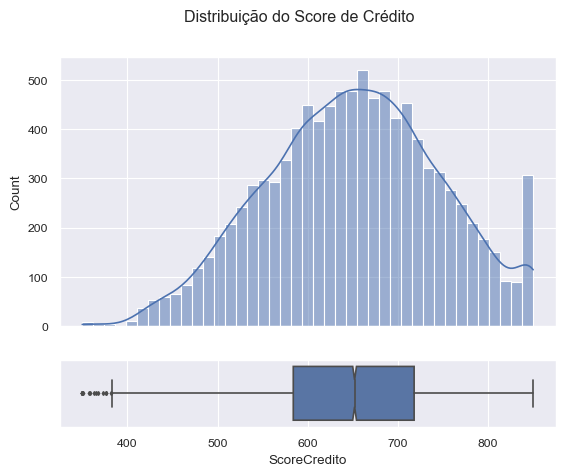

In [16]:
#Criação dos subplots
fig, axs = plt.subplots(ncols = 1, nrows = 2, sharex=True, height_ratios=[0.8, 0.2])
#Título da imagem
plt.suptitle('Distribuição do Score de Crédito')
#Gráfico 1 - Histograma
sns.histplot(x = df.ScoreCredito, kde = True, ax = axs[0], stat = 'count', cumulative = False)
#Gráfico 2 - Boxplot
sns.boxplot(x = df.ScoreCredito, fliersize = 2, notch = True, ax = axs[1])

3.1.2. Idade

<AxesSubplot: xlabel='Idade'>

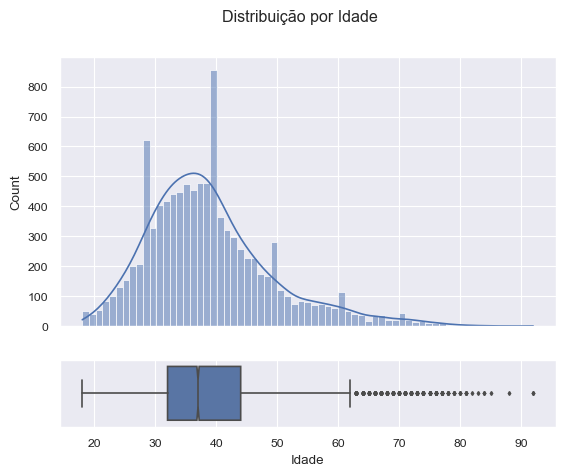

In [17]:
#Criação dos subplots
fig, axs = plt.subplots(ncols = 1, nrows = 2, sharex=True, height_ratios=[0.8, 0.2])
#Título da imagem
plt.suptitle('Distribuição por Idade')
#Gráfico 1 - Histograma
sns.histplot(x = df.Idade, kde = True, ax = axs[0], stat = 'count', cumulative = False)
#Gráfico 2 - Boxplot
sns.boxplot(x = df.Idade, fliersize = 2, notch = True, ax = axs[1])

3.1.3. Tempo de fidelidade

<AxesSubplot: xlabel='TempoFidelidade'>

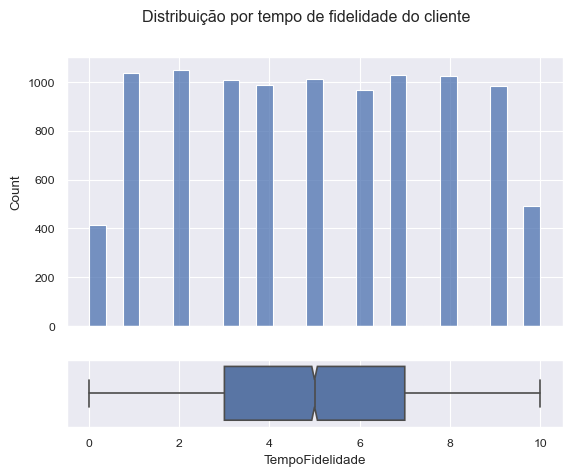

In [18]:
#Criação dos subplots
fig, axs = plt.subplots(ncols = 1, nrows = 2, sharex=True, height_ratios=[0.8, 0.2])
#Título da imagem
plt.suptitle('Distribuição por tempo de fidelidade do cliente')
#Gráfico 1 - Histograma
sns.histplot(x = df.TempoFidelidade, kde = False, ax = axs[0], stat = 'count', cumulative = False)
#Gráfico 2 - Boxplot
sns.boxplot(x = df.TempoFidelidade, fliersize = 2, notch = True, ax = axs[1])

3.1.3. Quantidade de produtos

<AxesSubplot: xlabel='QtdProdutos'>

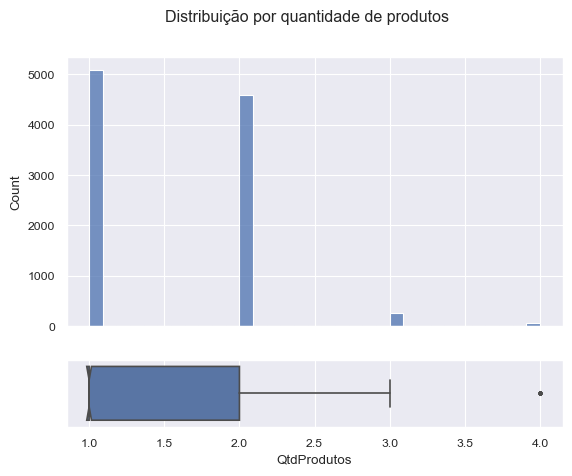

In [19]:
#Criação dos subplots
fig, axs = plt.subplots(ncols = 1, nrows = 2, sharex=True, height_ratios=[0.8, 0.2])
#Título da imagem
plt.suptitle('Distribuição por quantidade de produtos')
#Gráfico 1 - Histograma
sns.histplot(x = df.QtdProdutos, kde = False, ax = axs[0], stat = 'count', cumulative = False)
#Gráfico 2 - Boxplot
sns.boxplot(x = df.QtdProdutos, fliersize = 2, notch = True, ax = axs[1])

3.1.4. Salário Estimado

<AxesSubplot: xlabel='SalarioEstimado'>

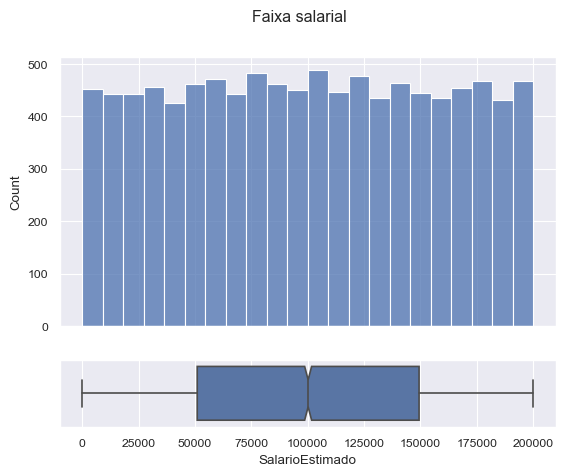

In [21]:
#Criação dos subplots
fig, axs = plt.subplots(ncols = 1, nrows = 2, sharex=True, height_ratios=[0.8, 0.2])
#Título da imagem
plt.suptitle('Faixa salarial')
#Gráfico 1 - Histograma
sns.histplot(x = df.SalarioEstimado, kde = False, ax = axs[0], stat = 'count', cumulative = False)
#Gráfico 2 - Boxplot
sns.boxplot(x = df.SalarioEstimado, fliersize = 2, notch = True, ax = axs[1])

In [ ]:
#Definição do estilo dos gráficos
#plt.style.use('seaborn-v0_8')
#pio.templates

In [ ]:
#Definição do template dos gráficos
#pio.templates.default = 'seaborn'

3.1.1. ScoreCredito

In [ ]:
df.ScoreCredito.describe()

In [ ]:
#Criando a figura para plotagem dos gráficos
fig = make_subplots(rows = 2, shared_xaxes = True, vertical_spacing = 0.05, row_heights = [0.6, 0.4])

#Gráfico 1 - Histograma
fig.add_trace(go.Histogram(x = df.ScoreCredito), row = 1, col = 1)

#Gráfico 2 - Boxplot
fig.add_trace(go.Box(x = df.ScoreCredito, name = '', orientation = 'h'), row = 2, col=1)

#Alterações de layout    
fig.update_layout(title = 'Score de Crédito', showlegend = False, title_font_size = 18)

#Configuração do eixo X    
fig.update_xaxes(range = [300, 900])

#Mostrar o gráfico
fig.show()

In [ ]:
df.Idade.describe()

In [ ]:
#Criando a figura para plotagem dos gráficos
fig = make_subplots(rows = 2, shared_xaxes = True, vertical_spacing = 0.05, row_heights = [0.6, 0.4])

#Gráfico 1 - Histograma
fig.add_trace(go.Histogram(x = df.Idade), row = 1, col = 1)

#Gráfico 2 - Boxplot
fig.add_trace(go.Box(x = df.Idade, name = '', orientation = 'h'), row = 2, col=1)

#Alterações de layout    
fig.update_layout(title = 'Idade', showlegend = False, title_font_size = 18)

#Configuração do eixo X    
fig.update_xaxes(range = [0, 100])

#Mostrar o gráfico
fig.show()

In [ ]:
df.TempoFidelidade.describe()

In [ ]:
#Criando a figura para plotagem dos gráficos
fig = make_subplots(rows = 2, shared_xaxes = True, vertical_spacing = 0.05, row_heights = [0.6, 0.4])

#Gráfico 1 - Histograma
fig.add_trace(go.Histogram(x = df.TempoFidelidade), row = 1, col = 1)

#Gráfico 2 - Boxplot
fig.add_trace(go.Box(x = df.TempoFidelidade, name = '', orientation = 'h'), row = 2, col=1)

#Alterações de layout    
fig.update_layout(title = 'Tempo de fidelidade (em anos)', showlegend = False, title_font_size = 18)

#Configuração do eixo X    
fig.update_xaxes(range = [-5, 15])

#Mostrar o gráfico
fig.show()

In [ ]:
df.Saldo.describe()

In [ ]:
#Criando a figura para plotagem dos gráficos
fig = make_subplots(rows = 2, shared_xaxes = True, vertical_spacing = 0.05, row_heights = [0.6, 0.4])

#Gráfico 1 - Histograma
fig.add_trace(go.Histogram(x = df.Saldo), row = 1, col = 1)

#Gráfico 2 - Boxplot
fig.add_trace(go.Box(x = df.Saldo, name = '', orientation = 'h'), row = 2, col=1)

#Alterações de layout    
fig.update_layout(title = 'Saldo', showlegend = False, title_font_size = 18)

#Configuração do eixo X    
fig.update_xaxes(range = [-10000, 300000])

#Mostrar o gráfico
fig.show()

In [ ]:
df_numericas

In [ ]:
df.QtdProdutos.describe()

In [ ]:
#Criando a figura para plotagem dos gráficos
fig = make_subplots(rows = 2, shared_xaxes = True, vertical_spacing = 0.05, row_heights = [0.6, 0.4])

#Gráfico 1 - Histograma
fig.add_trace(go.Histogram(x = df.QtdProdutos), row = 1, col = 1)

#Gráfico 2 - Boxplot
fig.add_trace(go.Box(x = df.QtdProdutos, name = '', orientation = 'h'), row = 2, col=1)

#Alterações de layout    
fig.update_layout(title = 'Quantidade de Produtos', showlegend = False, title_font_size = 18)

#Configuração do eixo X    
fig.update_xaxes(range = [0, 5])

#Mostrar o gráfico
fig.show()

In [ ]:
#Definições dos quartis, mediana e limites e contabilização de outliers
q1_ScoreCredito = np.nanpercentile(df.ScoreCredito, 25)
q3_ScoreCredito = np.nanpercentile(df.ScoreCredito, 75)
media_ScoreCredito = np.mean(df.ScoreCredito)
iqr_ScoreCredito = q3_ScoreCredito - q1_ScoreCredito
lower_f_ScoreCredito = q1_ScoreCredito - (1.5 * iqr_ScoreCredito)
upper_f_ScoreCredito = q3_ScoreCredito + (1.5 * iqr_ScoreCredito)

#Quantidade de outliers
ScoreCredito_outlier = []
for num in df.ScoreCredito:
    if num < lower_f_ScoreCredito:
        ScoreCredito_outlier.append(num)
    if num > upper_f_ScoreCredito:
        ScoreCredito_outlier.append(num)

#Quantidade de não outliers
ScoreCredito_non_outlier = []
for num in df.ScoreCredito:
    if num >= lower_f_ScoreCredito:
        ScoreCredito_non_outlier.append(num)
    if num <= upper_f_ScoreCredito:
        ScoreCredito_non_outlier.append(num)

In [ ]:
print('---Score de Crédito---')
print('Q1:', q1_ScoreCredito)
print('Q3:', q3_ScoreCredito)
print('Intervalo Interquartil (IQR):', iqr_ScoreCredito)
print('Média:', media_ScoreCredito)
print('Lower Fence:', lower_f_ScoreCredito)
print('Upper Fence:', upper_f_ScoreCredito)
print('Soma de valores únicos:', len(ScoreCredito_outlier))
print('Menor valor:', np.min(ScoreCredito_non_outlier))
print('Maior valor:', np.max(ScoreCredito_non_outlier))
print('Outliers:', len(ScoreCredito_outlier))
print('Não outliers:', len(ScoreCredito_non_outlier))

In [ ]:
#Criando figura para inserção de dois gráficos
fig, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': [5,1]}, sharex=True)
#Histograma
sns.histplot(x = df.ScoreCredito, kde=True, ax=ax[0])
ax[0].axvline(x = q1_ScoreCredito, linestyle='-', linewidth=1.5, color='black')
ax[0].axvline(x = q3_ScoreCredito, linestyle='-', linewidth=1.5, color='black')
ax[0].axvline(x = np.nanpercentile(df.ScoreCredito, 50), linestyle='-', linewidth=1.5, color='black')
ax[0].axvline(x = np.mean(df.ScoreCredito), linestyle=':', linewidth=2, color='red')
#Boxplot
sns.boxplot(x = df.ScoreCredito, ax=ax[1])

In [ ]:
def outlier(x):
    q1 = np.nanpercentile(x, 25)
    q3 = np.nanpercentile(x, 75)
    iqr = q3 - q1
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
    
    outlier = []
    for num in x:
        if num < lower_fence:
            outlier.append(num)
        if num > upper_fence:
            outlier.append(num)
            
    non_outlier = []
    for num in x:
        if num >= lower_fence:
            non_outlier.append(num)
        if num <= upper_fence:
            non_outlier.append(num)
    
    print(f'sum of unique value : {len(outlier)}' )
    print(f'lower_value: {np.min(non_outlier)}')
    print(f'upper_vaue: {np.max(non_outlier)}')

In [ ]:
norm_data = []
for y,x in enumerate(df_numericas,1):
    print(f'{y}. {x}')
    fig, ax = plt.subplots(2,1, sharex=True, gridspec_kw={'height_ratios':[5,1]})
    sns.histplot(data=df, x=x, kde=True, ax=ax[0])
    ax[0].axvline(np.nanpercentile(df[x], 25), c='red',linestyle='--')
    ax[0].axvline(np.nanpercentile(df[x], 50), c='red',linestyle='--')
    ax[0].axvline(np.nanpercentile(df[x], 75), c='red',linestyle='--')
    ax[0].axvline(np.mean(df[x]), c='blue',linestyle='--')
    
    sns.boxplot(data=df, x=x, ax=ax[1])
    ax[1].set_xlabel(f'{x}')
    plt.show()
    print(' ')
    df[x].describe()
    print(' ')
    outlier(df[x])
    print(' ')
    sk, pval = st.skewtest(df[x])
    if pval < 0.05:
        print(f'Data skewed with skew is {sk}')
    else:
        print(f'Data not skewed')
    print(' ')
    norm, pval = st.normaltest(df[x])
    if pval < 0.05:
        print(f'Data not normal')
    else:
        print(f'Data normal')
        norm_data.append(x)
    print('-'*50)
    print(' ')